# **Apple Stock Price Prediction and Analysis using multiple Regression models**

In [267]:
# Importing all the required libraries

import numpy as np
import pandas_datareader as pdr
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import style
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta

%matplotlib inline

In [268]:
# The historical data of stock prices of Apple was downloaded from Yahoo! Finance Website in the .csv format
# Website - https://finance.yahoo.com/quote/AAPL/history?p=AAPL

# Reading the CSV file

df = pd.read_csv('AAPL.csv')
df.set_index('Date', inplace=True)
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-20,179.259995,179.699997,175.399994,175.490005,175.490005,58436200
2023-09-21,174.550003,176.300003,173.860001,173.929993,173.929993,63047900
2023-09-22,174.669998,177.080002,174.050003,174.789993,174.789993,56663000
2023-09-25,174.199997,176.970001,174.149994,176.080002,176.080002,46172700
2023-09-26,174.820007,175.199997,171.660004,171.960007,171.960007,64518500


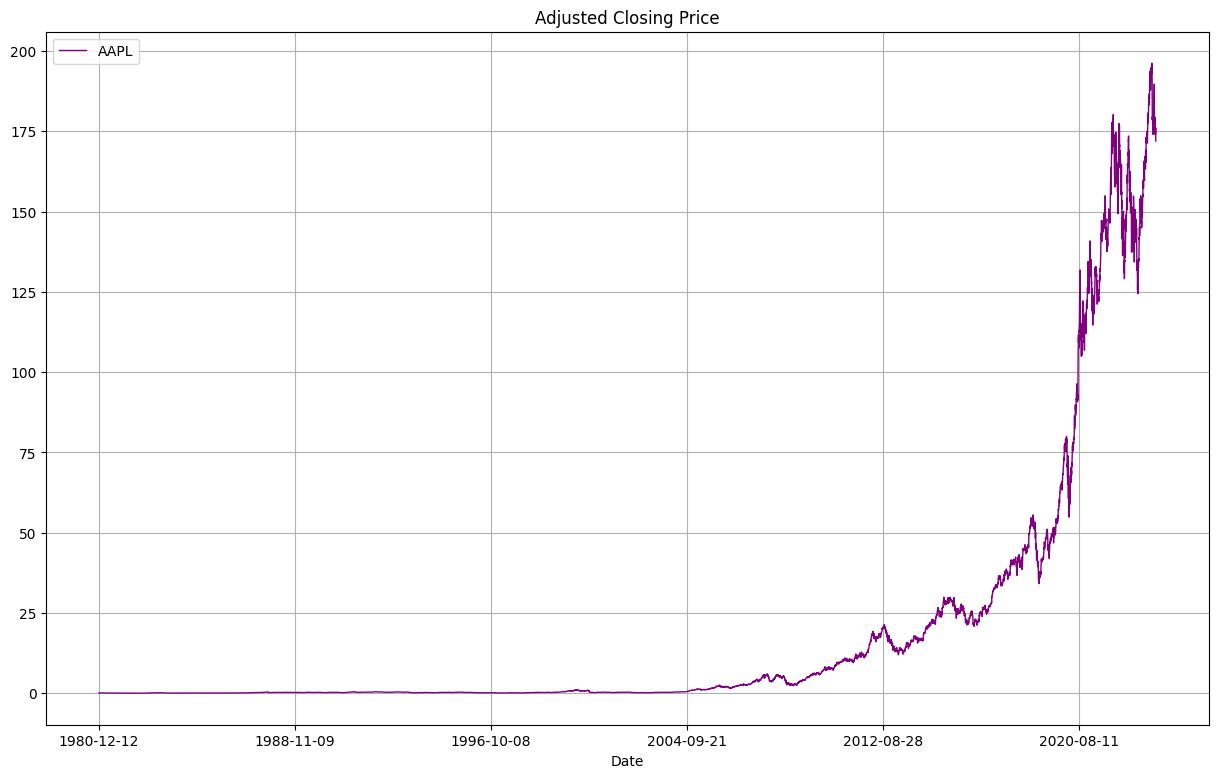

In [269]:
# Visualizing the stock prices

df['Adj Close'].plot(label='AAPL', figsize=(15, 9), title='Adjusted Closing Price', color='purple', linewidth=1.0, grid=True)
plt.legend()

In [270]:
# Rolling Mean / Moving Average to remove the noise in the graph and smoothen it

close_col = df['Adj Close']
mvag = close_col.rolling(window=100).mean()     # Taking an average over the window size of 100.
# Increasing the window size can make it more smoother, but less informative and vice-versa.

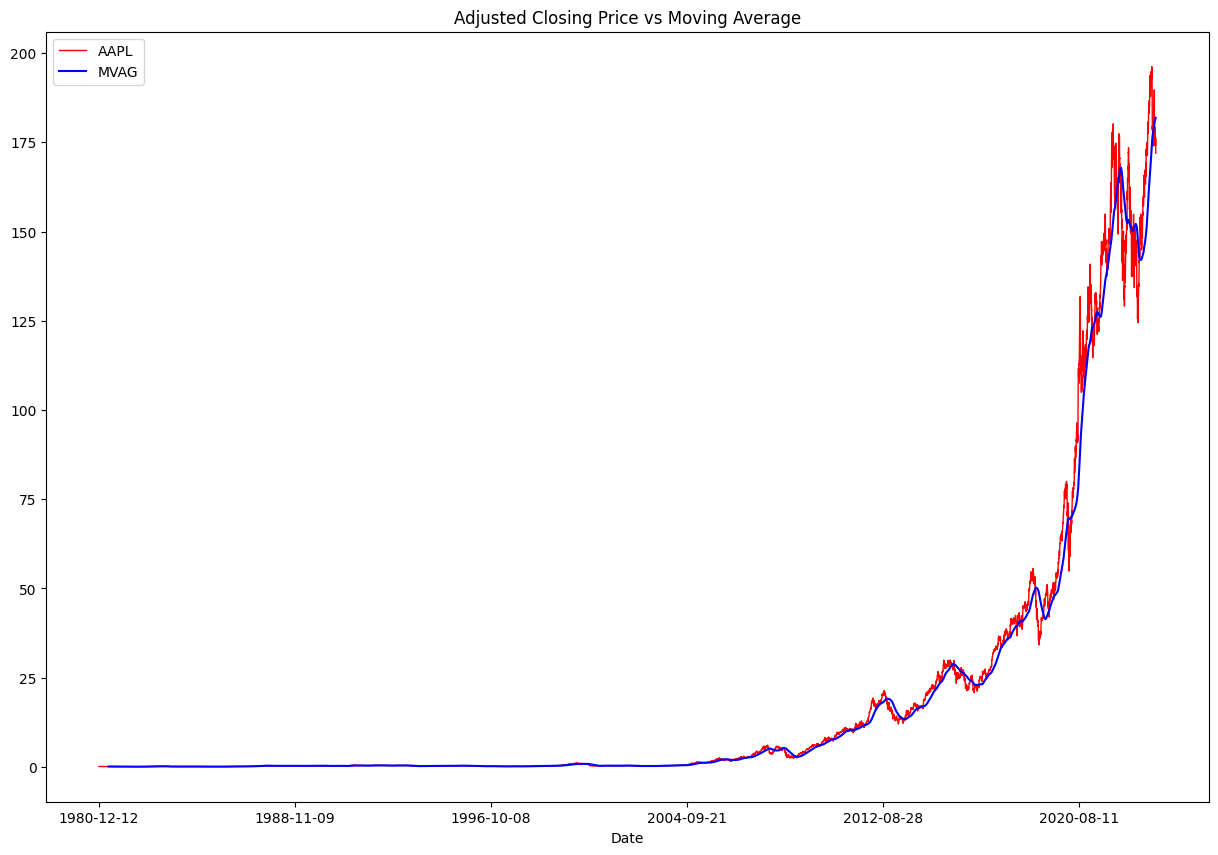

In [271]:
# Visualizing Rolling Mean and Adjusted Closing Price together

df['Adj Close'].plot(label='AAPL', figsize=(15,10), title='Adjusted Closing Price vs Moving Average', color='red', linewidth=1.0, grid=True)
mvag.plot(label='MVAG', color='blue')
plt.legend()

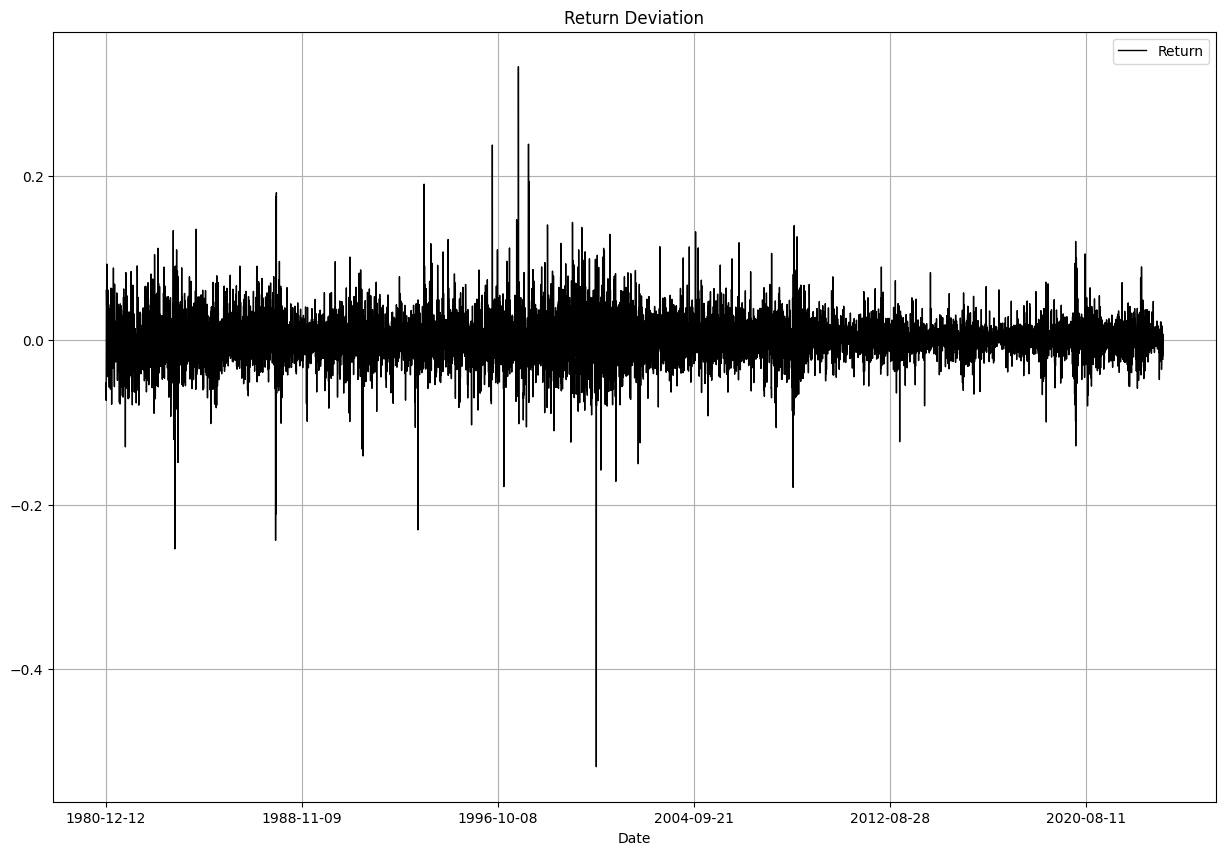

In [272]:
# Return Deviation measures the Mean of the Probability Distribution of Investment Returns if it has a positive/negative Average Net Outcome

rd = close_col / close_col.shift(1) - 1
rd.plot(label='Return', figsize=(15, 10), title='Return Deviation', color='black', linewidth=1.0, grid=True)
plt.legend()

In [273]:
# Number of days for which to predict the stock prices

predict_days = 15

In [274]:
# Shifting by the Number of Predict days for Prediction array

df['Prediction'] = df['Adj Close'].shift(-predict_days)
# print(df['Prediction'])
# print(df['Adj Close'])

In [275]:
# Dropping the Prediction Row

X = np.array(df.drop(['Prediction'], axis = 1))
X = X[:-predict_days]      # Size upto predict days
# print(X)
print(X.shape)

(10772, 6)


In [276]:
# Creating the Prediction Row

y = np.array(df['Prediction'])
y = y[:-predict_days]      # Size upto predict_days
# print(y)
print(y.shape)

(10772,)


In [277]:
# Splitting the data into Training data & Testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)      #Splitting the data into 80% for training & 20% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8617, 6)
(8617,)
(2155, 6)
(2155,)


## 1. Linear Regression
Building First model of regression - Linear Regression

In [278]:
# Defining the Linear Regression Model

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)      # Training the algorithm

LinearRegression()

In [279]:
# Score of the Linear Regression Model (Using the Test Data)

linear_model_score = linear_model.score(X_test, y_test)
print('Linear Model score:', linear_model_score)

Linear Model score: 0.9942510082757476


In [280]:
# Define the Real & Prediction Values

X_predict = np.array(df.drop(['Prediction'],axis = 1))[-predict_days:]

linear_model_predict_prediction = linear_model.predict(X_predict)
linear_model_real_prediction = linear_model.predict(np.array(df.drop(['Prediction'], axis = 1)))

In [281]:
# Defining some Parameters

predicted_dates = []
recent_date = df.index.max()
display_at = 1000
alpha = 0.5

for i in range(predict_days):
    recent_date += str(timedelta(days=1))
    predicted_dates.append(recent_date)

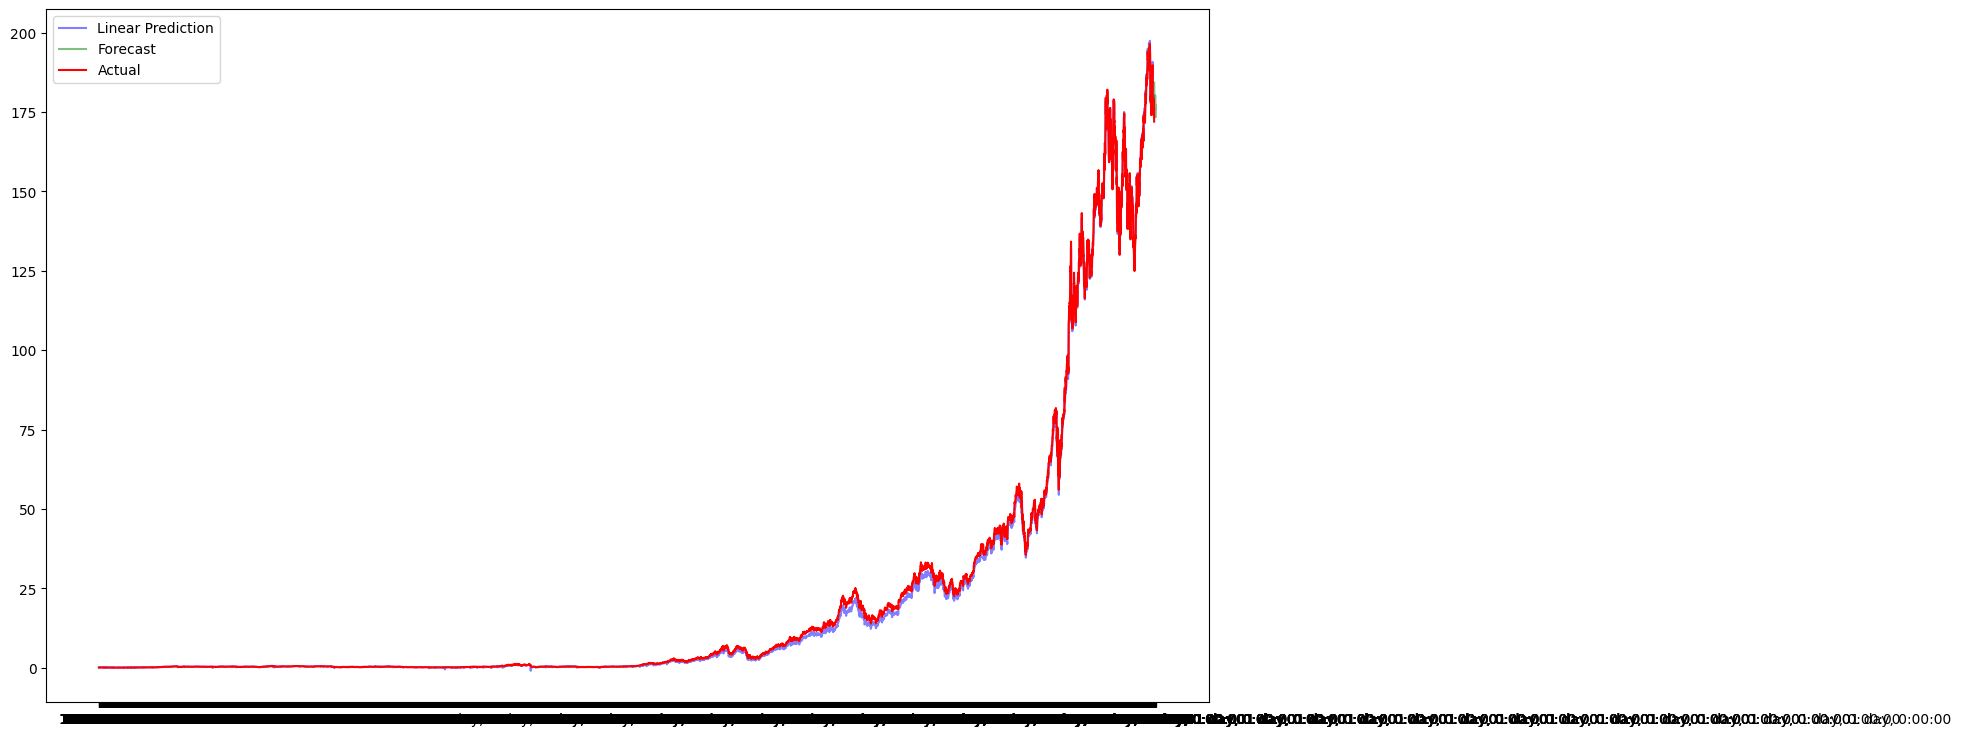

In [282]:
# Plotting the Actual and Prediction Prices

plt.figure(figsize=(15, 9))
plt.plot(df.index[display_at:], linear_model_real_prediction[display_at:], label='Linear Prediction', color='blue', alpha=alpha)
plt.plot(predicted_dates, linear_model_predict_prediction, label='Forecast', color='green', alpha=alpha)
plt.plot(df.index[display_at:], df['Close'][display_at:], label='Actual', color='red')
plt.legend()

In [283]:
# Make predictions using the Linear Regression model
linear_model_predict_prediction = linear_model.predict(X_predict)

# Print the predicted stock prices using Linear Regression
print("Predicted Stock Prices using Linear Regression:")
print(linear_model_predict_prediction)

Predicted Stock Prices using Linear Regression:
[184.24509759 178.17210707 179.89178887 180.16188495 177.491916
 175.79573319 176.78529603 176.04177165 179.35811878 180.22756373
 177.13351628 175.71079348 176.47139642 177.36207506 173.44189446]


In [284]:
print("Predicted Stock Prices using Linear Regression:")
linear_model_predictions_df = pd.DataFrame({
    'Date': predicted_dates,
    'Linear Regression Predicted Price': linear_model_predict_prediction
})
print(linear_model_predictions_df)

Predicted Stock Prices using Linear Regression:
                                                 Date  \
0                            2023-09-261 day, 0:00:00   
1              2023-09-261 day, 0:00:001 day, 0:00:00   
2   2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
3   2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
4   2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
5   2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
6   2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
7   2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
8   2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
9   2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
10  2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
11  2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
12  2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
13  2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
14  2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   

    Linear Regression Predicted Price  

## 2. Ridge Regression
Building Third model of regression - Lasso Regression

In [285]:
# Defining the Ridge Regression Model

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)     # Training the algorithm

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.06405e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge()

In [286]:
# Score of the Ridge Regression Model (Using the Test Data)

ridge_model_score = ridge_model.score(X_test, y_test)
print('Ridge Model score:', ridge_model_score)

Ridge Model score: 0.994250817804555


In [287]:
# Define the Real & Prediction Values

ridge_model_predict_prediction = ridge_model.predict(X_predict)
ridge_model_real_prediction = ridge_model.predict(np.array(df.drop(['Prediction'], axis = 1)))

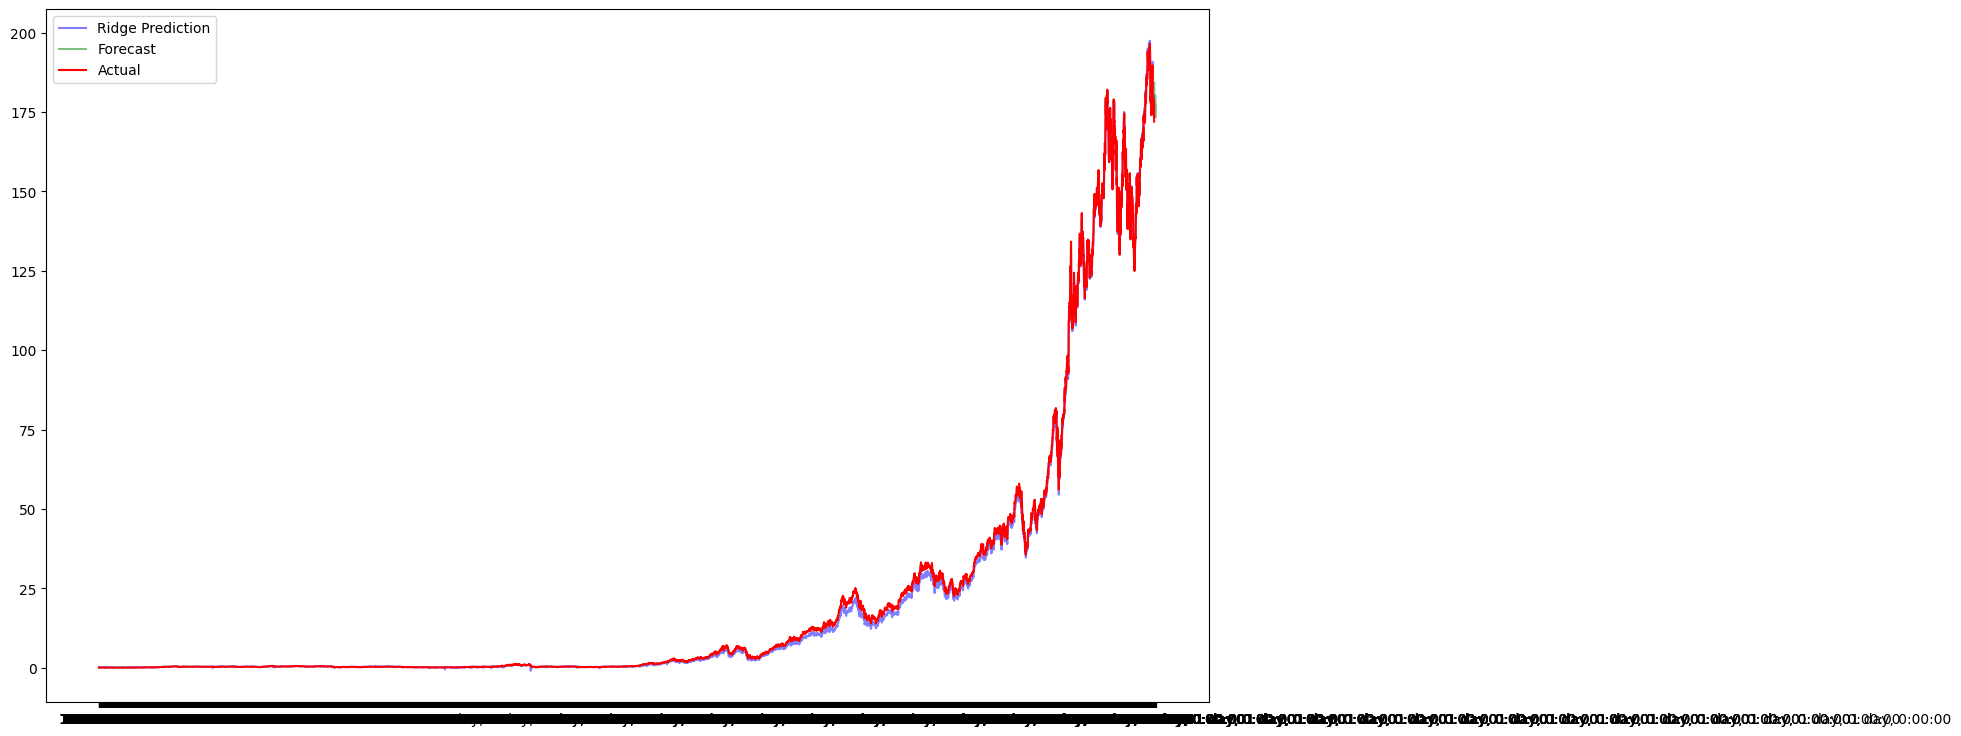

In [288]:
# Plotting the Actual and Prediction Prices

plt.figure(figsize=(15, 9))
plt.plot(df.index[display_at:], ridge_model_real_prediction[display_at:], label='Ridge Prediction', color='blue', alpha=alpha)
plt.plot(predicted_dates, ridge_model_predict_prediction, label='Forecast', color='green', alpha=alpha)
plt.plot(df.index[display_at:], df['Close'][display_at:], label='Actual', color='red')
plt.legend()

In [289]:
# Make predictions using the Ridge Regression model
ridge_model_predict_prediction = ridge_model.predict(X_predict)

# Print the predicted stock prices using Ridge Regression
print("\nPredicted Stock Prices using Ridge Regression:")
print(ridge_model_predict_prediction)


Predicted Stock Prices using Ridge Regression:
[184.24603151 178.17293029 179.88944195 180.16365795 177.49260034
 175.79460602 176.78489652 176.04277319 179.35629075 180.22686908
 177.13268843 175.70823501 176.46886584 177.36056287 173.44138292]


In [290]:
print("\nPredicted Stock Prices using Ridge Regression:")
ridge_model_predictions_df = pd.DataFrame({
    'Date': predicted_dates,
    'Ridge Regression Predicted Price': ridge_model_predict_prediction
})
print(ridge_model_predictions_df)


Predicted Stock Prices using Ridge Regression:
                                                 Date  \
0                            2023-09-261 day, 0:00:00   
1              2023-09-261 day, 0:00:001 day, 0:00:00   
2   2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
3   2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
4   2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
5   2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
6   2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
7   2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
8   2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
9   2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
10  2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
11  2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
12  2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
13  2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
14  2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   

    Ridge Regression Predicted Price  


## 3. Lasso Regression
Building Third model of regression - Lasso Regression

In [291]:
# Defining the Lasso Regression Model

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)     # Training the algorithm

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.132e+03, tolerance: 1.344e+03
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [292]:
# Score of the Lasso Regression Model (Using the Test Data)

lasso_model_score = lasso_model.score(X_test, y_test)
print('Lasso Model score:', lasso_model_score)

Lasso Model score: 0.9938613171947901


In [293]:
# Define the Real & Prediction Values

lasso_model_predict_prediction = lasso_model.predict(X_predict)
lasso_model_real_prediction = lasso_model.predict(np.array(df.drop(['Prediction'],axis = 1)))

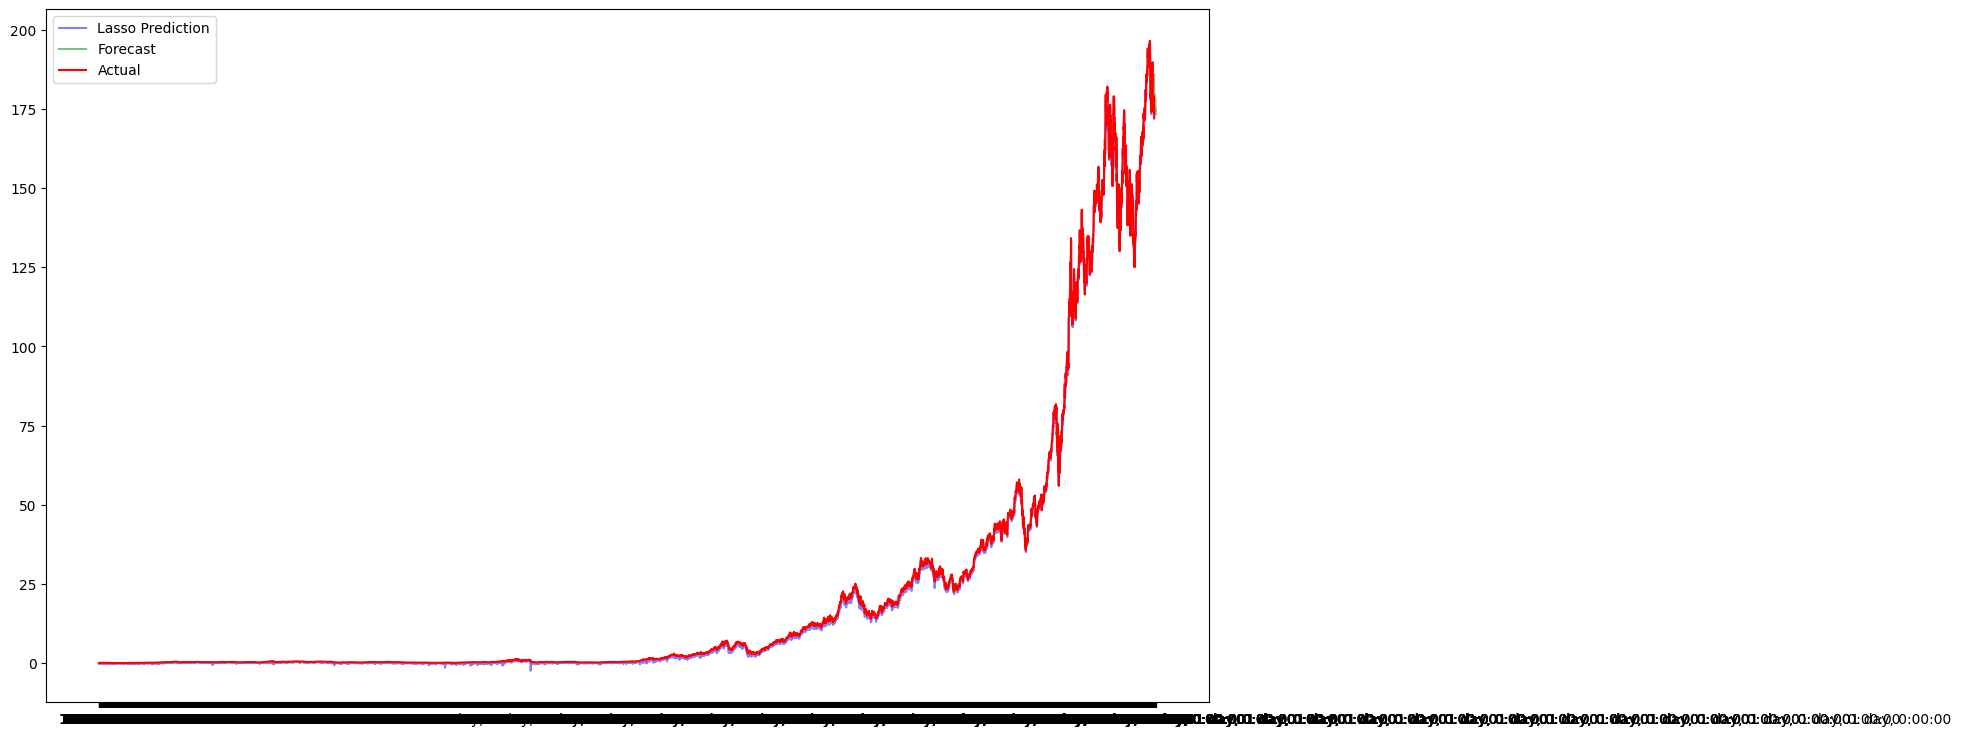

In [294]:
# Plotting the Actual and Prediction Prices

plt.figure(figsize=(15, 9))
plt.plot(df.index[display_at:], lasso_model_real_prediction[display_at:], label='Lasso Prediction', c='blue', alpha=alpha)
plt.plot(predicted_dates, lasso_model_predict_prediction, label='Forecast', color='green', alpha=alpha)
plt.plot(df.index[display_at:], df['Close'][display_at:], label='Actual', color='red')
plt.legend()

In [295]:
# Make predictions using the Lasso Regression model
lasso_model_predict_prediction = lasso_model.predict(X_predict)

# Print the predicted stock prices using Lasso Regression
print("\nPredicted Stock Prices using Lasso Regression:")
print(lasso_model_predict_prediction)



Predicted Stock Prices using Lasso Regression:
[185.74916647 176.19507928 178.16250899 179.48915216 177.86066691
 175.28636309 174.66755627 175.5335291  177.11156602 178.10634029
 177.37145116 174.15777471 174.66489743 174.99808275 173.32239953]


In [296]:
print("\nPredicted Stock Prices using Lasso Regression:")
lasso_model_predictions_df = pd.DataFrame({
    'Date': predicted_dates,
    'Lasso Regression Predicted Price': lasso_model_predict_prediction
})
print(lasso_model_predictions_df)


Predicted Stock Prices using Lasso Regression:
                                                 Date  \
0                            2023-09-261 day, 0:00:00   
1              2023-09-261 day, 0:00:001 day, 0:00:00   
2   2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
3   2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
4   2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
5   2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
6   2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
7   2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
8   2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
9   2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
10  2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
11  2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
12  2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
13  2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   
14  2023-09-261 day, 0:00:001 day, 0:00:001 day, 0...   

    Lasso Regression Predicted Price  


In [297]:
# Define the number of days for which to predict the stock prices
predict_days = 15

# Define the initial recent_date as a datetime object
recent_date = datetime.strptime(df.index.max(), '%Y-%m-%d')

# Create an empty list to store predicted dates
predicted_dates = []

for i in range(predict_days):
    # Add one day to the recent_date using timedelta
    recent_date += timedelta(days=1)
    predicted_dates.append(recent_date.strftime('%Y-%m-%d'))  # Convert back to a string for visualization


In [298]:
# Make predictions using the Linear Regression model
linear_model_predict_prediction = linear_model.predict(X_predict)

# Make predictions using the Ridge Regression model
ridge_model_predict_prediction = ridge_model.predict(X_predict)

# Make predictions using the Lasso Regression model
lasso_model_predict_prediction = lasso_model.predict(X_predict)

# Ensure all arrays have the same legth
assert len(predicted_dates) == len(linear_model_predict_prediction) == len(ridge_model_predict_prediction) == len(lasso_model_predict_prediction), "Arrays must be of the same length"

# Print the predicted stock prices along with dates for each model
linear_model_predictions_df = pd.DataFrame({
    'Date': predicted_dates,
    'Linear Regression Predicted Price': linear_model_predict_prediction
})
print("Predicted Stock Prices using Linear Regression:")
print(linear_model_predictions_df)

ridge_model_predictions_df = pd.DataFrame({
    'Date': predicted_dates,
    'Ridge Regression Predicted Price': ridge_model_predict_prediction
})
print("\nPredicted Stock Prices using Ridge Regression:")
print(ridge_model_predictions_df)

lasso_model_predictions_df = pd.DataFrame({
    'Date': predicted_dates,
    'Lasso Regression Predicted Price': lasso_model_predict_prediction
})
print("\nPredicted Stock Prices using Lasso Regression:")
print(lasso_model_predictions_df)


Predicted Stock Prices using Linear Regression:
          Date  Linear Regression Predicted Price
0   2023-09-27                         184.245098
1   2023-09-28                         178.172107
2   2023-09-29                         179.891789
3   2023-09-30                         180.161885
4   2023-10-01                         177.491916
5   2023-10-02                         175.795733
6   2023-10-03                         176.785296
7   2023-10-04                         176.041772
8   2023-10-05                         179.358119
9   2023-10-06                         180.227564
10  2023-10-07                         177.133516
11  2023-10-08                         175.710793
12  2023-10-09                         176.471396
13  2023-10-10                         177.362075
14  2023-10-11                         173.441894

Predicted Stock Prices using Ridge Regression:
          Date  Ridge Regression Predicted Price
0   2023-09-27                        184.246032
1   20

In [299]:
# Best Performance of the Regressor Models

best_score = max(linear_model_score, ridge_model_score, lasso_model_score)
index = np.argmax([linear_model_score, ridge_model_score, lasso_model_score])
best_regressor = {0:'Linear Regression Model',
                  1:'Ridge Model',
                  2:'Lasso Model'}
print("The Best Performer is {0} with the score of {1}%.".format(best_regressor[index], best_score*100))

The Best Performer is Linear Regression Model with the score of 99.42510082757477%.
